# LHC Particle Physics Data Analysis

In this notebook we will work with realistic particle physics data from the Large Hadron Collider (LHC). The goal is to identify Higgs boson signals from QCD background noise using jet substructure analysis and cut-based optimization.

## Dataset Information

Two pT (transverse momentum) ranges are provided:

### Low pT (250-500 GeV/c): `Sample_pt_250_500`
- **Training samples:**
  - `higgs_100000_pt_250_500.pkl` (Expected yields: N_higgs = 100)
  - `qcd_100000_pt_250_500.pkl` (Expected yields: N_qcd = 20,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_250_500.h5`
  - `data_lowLumi_pt_250_500.h5`

### High pT (1000-1200 GeV/c): `Sample_pt_1000_1200`
- **Training samples:**
  - `higgs_100000_pt_1000_1200.pkl` (Expected yields: N_higgs = 50)
  - `qcd_100000_pt_1000_1200.pkl` (Expected yields: N_qcd = 2,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_1000_1200.h5`
  - `data_lowLumi_pt_1000_1200.h5`

## Physics Background

### What is a Jet?
A jet is a collection of particles traveling in the same direction, originating from a hard quark or gluon through bremsstrahlung and fragmentation processes.

### Jet Substructure
At high transverse momenta, heavy particles (W, Z, Higgs, top quarks) have collimated decays. Standard jet identification fails because all decay products end up in a single jet. **Jet substructure variables** computed from constituent 4-momenta help distinguish boosted heavy particles with two-pronged decays from QCD jets.

### Key Variables:
- **mass**: Jet invariant mass (GeV)
- **d2**: Jet substructure variable for two-pronged discrimination
- **η (eta)**: Pseudorapidity (geometric quantity related to polar angle)
- **φ (phi)**: Azimuthal angle around the beam

## Setup and Data Loading

In [1]:
# Import required libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the QCD background data
# Use pickle to load: Sample_pt_250_500/qcd_100000_pt_250_500.pkl
with open('Sample_pt_250_500/qcd_100000_pt_250_500.pkl', 'rb') as f:
    qcd_data = pickle.load(f)
    qcd_df = pd.DataFrame(qcd_data)

In [3]:
# Load the Higgs signal data
# Use pickle to load: Sample_pt_250_500/higgs_100000_pt_250_500.pkl
with open('Sample_pt_250_500/higgs_100000_pt_250_500.pkl', 'rb') as f:
    higgs_data = pickle.load(f)
    higgs_df = pd.DataFrame(higgs_data)

In [4]:
# Explore the data structure
# Print the keys available in the data dictionary
print("QCD Data Keys:", qcd_df.columns.tolist())
print("Higgs Data Keys:", higgs_df.columns.tolist())

# Print the first few values of 'mass' and 'd2'
print("QCD Mass Values:", "\n", qcd_df['mass'].head())
print("QCD d2 Values:", "\n", qcd_df['d2'].head())

print("Higgs Mass Values:", "\n", higgs_df['mass'].head())
print("Higgs d2 Values:", "\n", higgs_df['d2'].head())

QCD Data Keys: ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
Higgs Data Keys: ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
QCD Mass Values: 
 0    125.298720
1     88.047054
2     85.794174
3     42.947328
4     59.542227
Name: mass, dtype: float64
QCD d2 Values: 
 0    3.304886
1    2.439089
2    4.118371
3    8.038338
4    6.353842
Name: d2, dtype: float64
Higgs Mass Values: 
 0    125.150365
1    130.552672
2    125.703063
3    126.215853
4    132.182504
Name: mass, dtype: float64
Higgs d2 Values: 
 0    1.298020
1    1.445626
2    0.986597
3    1.218467
4    1.291784
Name: d2, dtype: float64


# Visualization

Below we will xplore the low pT dataset (`Sample_pt_250_500`) and make representative plots of each feature to understand the data structure and characteristics.

## Individual Feature Distributions

Create histograms for each available feature in both signal and background datasets.

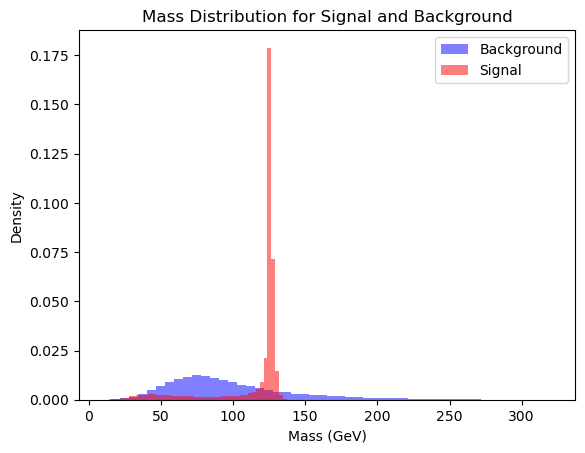

In [5]:
# Plot mass distributions for signal and background
# Create overlaid histograms with proper labels and legends

plt.hist(qcd_df['mass'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
plt.hist(higgs_df['mass'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
plt.title('Mass Distribution for Signal and Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('Density')
plt.legend();

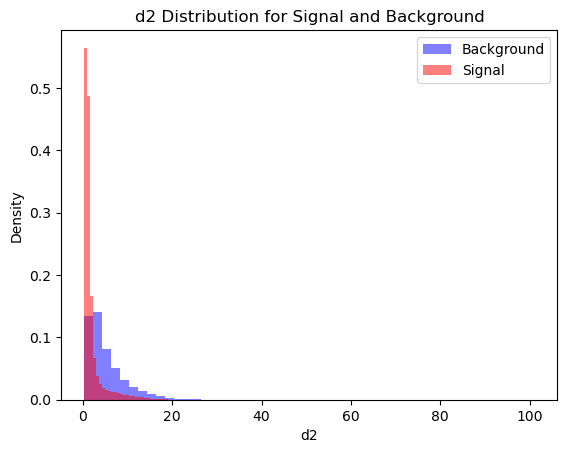

In [6]:
# Plot d2 distributions for signal and background

plt.hist(qcd_df['d2'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
plt.hist(higgs_df['d2'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
plt.title('d2 Distribution for Signal and Background')
plt.xlabel('d2')
plt.ylabel('Density')
plt.legend();

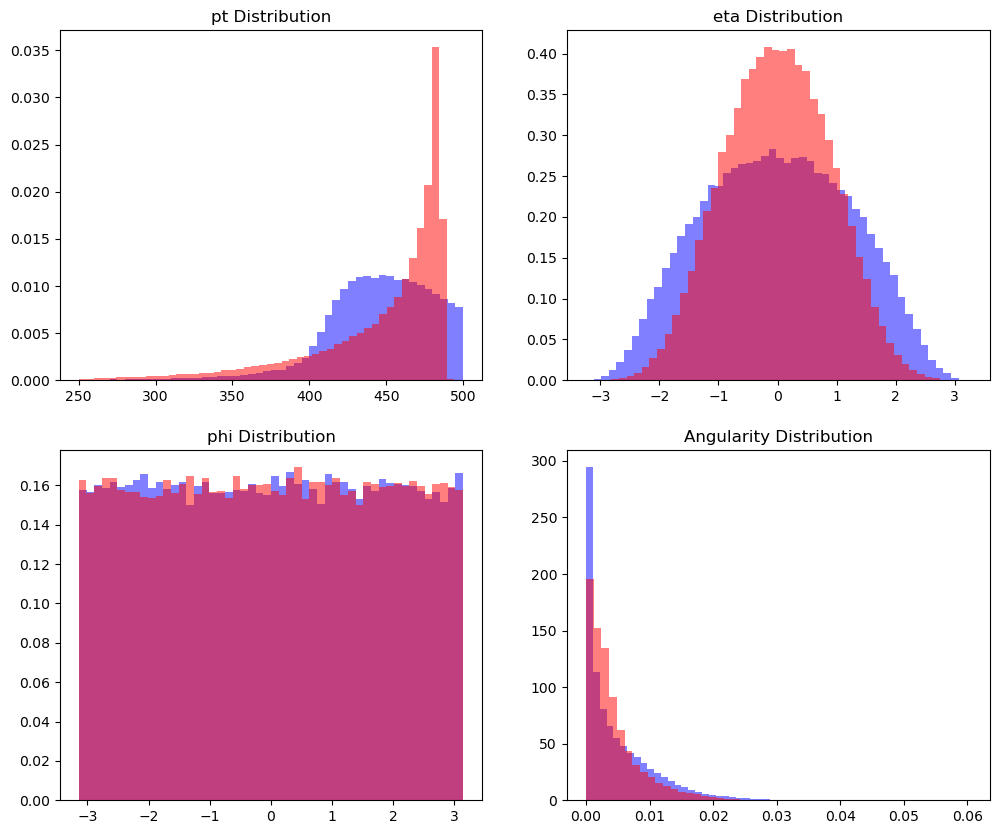

In [7]:
# Plot other available features (pt, eta, phi, etc.)
# Create a multi-panel figure showing all features

total = len(qcd_df.columns)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].hist(qcd_df['pt'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
ax[0, 0].hist(higgs_df['pt'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
ax[0, 0].set_title('pt Distribution')

ax[0, 1].hist(qcd_df['eta'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
ax[0, 1].hist(higgs_df['eta'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
ax[0, 1].set_title('eta Distribution')

ax[1, 0].hist(qcd_df['phi'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
ax[1, 0].hist(higgs_df['phi'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
ax[1, 0].set_title('phi Distribution')

ax[1, 1].hist(qcd_df['angularity'], bins=50, alpha=0.5, label='Background', color='blue', density=True)
ax[1, 1].hist(higgs_df['angularity'], bins=50, alpha=0.5, label='Signal', color='red', density=True)
ax[1, 1].set_title('Angularity Distribution');


## Summary Statistics

Calculate and display basic statistics for key features.

In [8]:
# Calculate mean, std, min, max for mass and d2
# Make panda DataFrame tables for better visualization
stats = ['mean', 'std', 'min', 'max']
mass_stats = {
    'QCD': [qcd_df['mass'].mean(), qcd_df['mass'].std(), qcd_df['mass'].min(), qcd_df['mass'].max()],
    'Higgs': [higgs_df['mass'].mean(), higgs_df['mass'].std(), higgs_df['mass'].min(), higgs_df['mass'].max()]
}
d2_stats = {
    'QCD': [qcd_df['d2'].mean(), qcd_df['d2'].std(), qcd_df['d2'].min(), qcd_df['d2'].max()],
    'Higgs': [higgs_df['d2'].mean(), higgs_df['d2'].std(), higgs_df['d2'].min(), higgs_df['d2'].max()]
}
mass_stats_df = pd.DataFrame(mass_stats, index=stats)
d2_stats_df = pd.DataFrame(d2_stats, index=stats)

print("Mass Statistics:\n", np.round(mass_stats_df, decimals=3))
print("\nD2 Statistics:\n", np.round(d2_stats_df, decimals=3))

Mass Statistics:
           QCD    Higgs
mean   97.738  114.892
std    43.493   25.351
min     9.293    8.971
max   321.398  142.440

D2 Statistics:
           QCD   Higgs
mean    5.209   1.967
std     4.285   2.501
min     0.281   0.275
max   101.157  33.723


# Data Exploration

Study correlations between mass and d2 jet substructure variable to build a cut-based analysis.

## Distribution Comparison and 2D Scatter Plots

Here we create mass and d2 distributions, and 2D scatter plots for signal (```'Higgs Signal'```) and background (```'QCD Background'```).

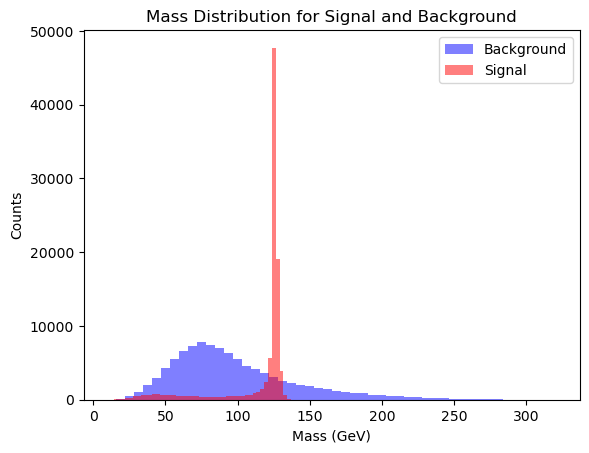

In [9]:
# Create two plots showing mass distributions (signal vs background)
# Describe the shape and discrimination power

plt.hist(qcd_df['mass'], bins=50, alpha=0.5, label='Background', color='blue', density=False)
plt.hist(higgs_df['mass'], bins=50, alpha=0.5, label='Signal', color='red', density=False)
plt.title('Mass Distribution for Signal and Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('Counts')
plt.legend();

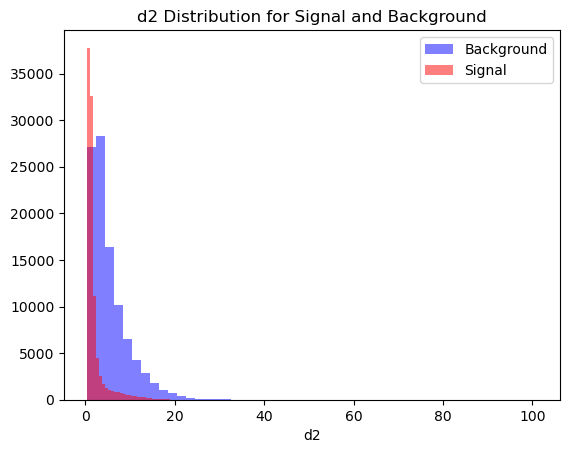

In [10]:
# Create two plots showing d2 distributions (signal vs background)
# Describe the shape and discrimination power

plt.hist(qcd_df['d2'], bins=50, alpha=0.5, label='Background', color='blue', density=False)
plt.hist(higgs_df['d2'], bins=50, alpha=0.5, label='Signal', color='red', density=False)
plt.title('d2 Distribution for Signal and Background')
plt.xlabel('d2')
plt.legend();

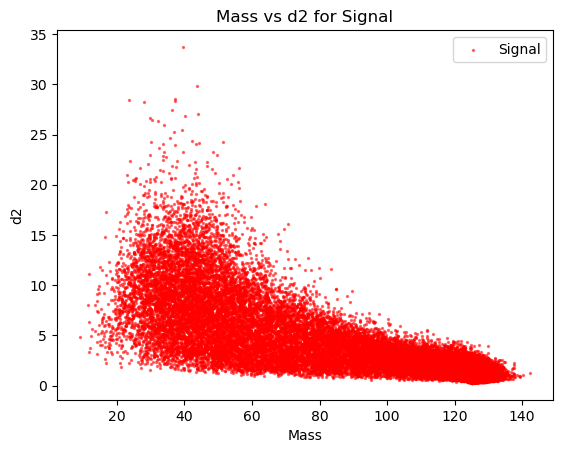

In [11]:
# Create 2D scatter plot of mass vs d2 for signal

plt.scatter(higgs_df['mass'], higgs_df['d2'], alpha=0.5, label='Signal', color='red', s=2)
plt.title('Mass vs d2 for Signal')
plt.xlabel('Mass')
plt.ylabel('d2')
plt.legend();

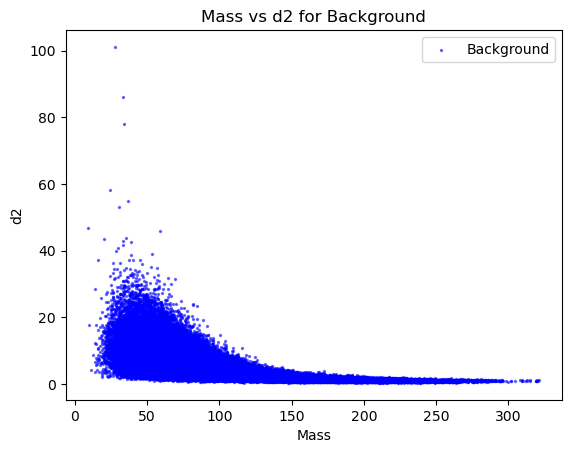

In [12]:
# Create 2D scatter plot of mass vs d2 for background
plt.scatter(qcd_df['mass'], qcd_df['d2'], alpha=0.5, label='Background', color='blue', s=2)
plt.title('Mass vs d2 for Background')
plt.xlabel('Mass')
plt.ylabel('d2')
plt.legend();

#### The mass of the signal is more localized (between 100-140) compared to the broad background (0-300). Additionally, d2 is also mich more narrow and localized, approximately 1/2 the width of the background.

## Weighted Distributions

Re-weight signal (N_signal = 100) and background (N_background = 20,000) to match expected yields.

In [13]:
# Calculate weights for signal and background
# N_signal_expected = 100, N_background_expected = 20000

N_signal_expected = 100
N_background_expected = 20000

higgs_df['weight'] = N_signal_expected / len(higgs_df)
qcd_df['weight'] = N_background_expected / len(qcd_df)

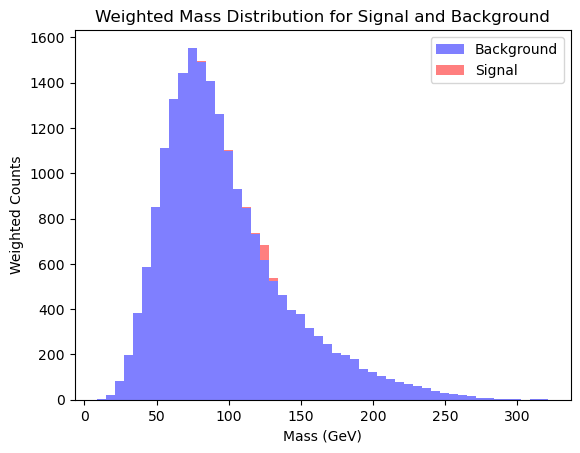

In [14]:
# Create weighted histograms with signal stacked on background for mass
# Use plt.hist with weights parameter and stacked=True

plt.hist([qcd_df['mass'], higgs_df['mass']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['blue', 'red'], weights=[qcd_df['weight'], higgs_df['weight']], stacked=True)
plt.title('Weighted Mass Distribution for Signal and Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Counts')
plt.legend();

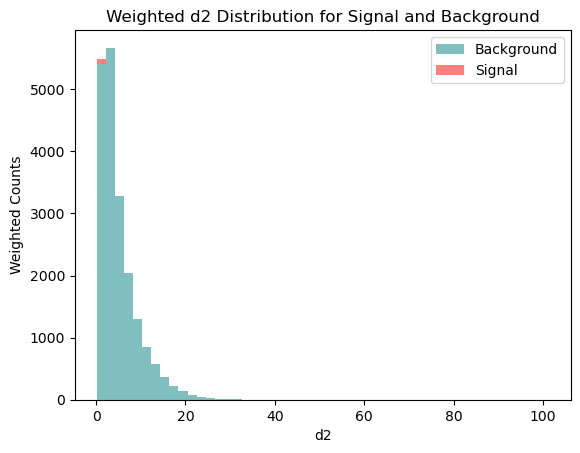

In [15]:
# Create weighted histograms with signal stacked on background for d2

plt.hist([qcd_df['d2'], higgs_df['d2']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['teal', 'red'], weights=[qcd_df['weight'], higgs_df['weight']], stacked=True)
plt.title('Weighted d2 Distribution for Signal and Background')
plt.xlabel('d2')
plt.ylabel('Weighted Counts')
plt.legend();

#### As seen above, the signal is very small and not very visible compared to the background

## Mass Window Selection

Apply a mass cut of [120, 130] GeV to enhance signal visibility.

In [16]:
# Apply mass cut [120, 130] GeV
# Create boolean masks for signal and background

mass_cut_signal = (higgs_df['mass'] >= 120) & (higgs_df['mass'] <= 130)
mass_cut_background = (qcd_df['mass'] >= 120) & (qcd_df['mass'] <= 130)

higgs_df_cut = higgs_df[mass_cut_signal]
qcd_df_cut = qcd_df[mass_cut_background]

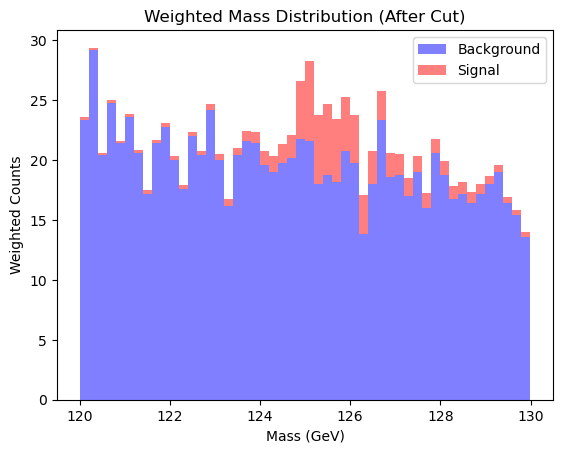

In [17]:
# Plot weighted mass distributions after the cut

plt.hist([qcd_df_cut['mass'], higgs_df_cut['mass']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['blue', 'red'], weights=[qcd_df_cut['weight'], higgs_df_cut['weight']], stacked=True)
plt.title('Weighted Mass Distribution (After Cut)')
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Counts')
plt.legend();

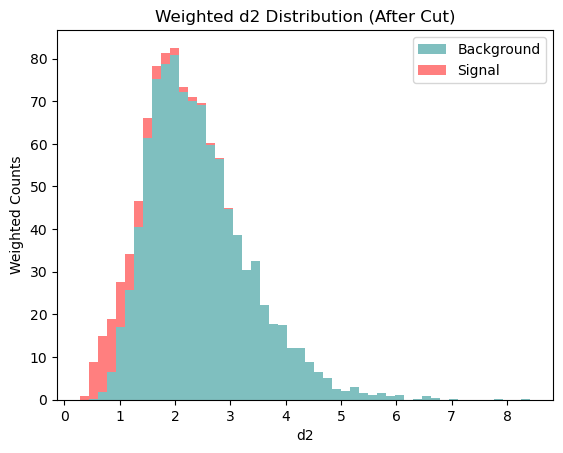

In [18]:
# Plot weighted d2 distributions after the mass cut

plt.hist([qcd_df_cut['d2'], higgs_df_cut['d2']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['teal', 'red'], weights=[qcd_df_cut['weight'], higgs_df_cut['weight']], stacked=True)
plt.title('Weighted d2 Distribution (After Cut)')
plt.xlabel('d2')
plt.ylabel('Weighted Counts')
plt.legend();

#### With the cuts, the signal is now more visible since we localized it in a region where the signal peaks.

# Significance Optimization

Scan over d2 values to find the optimal cut that maximizes discovery significance.

**Significance Formula:** $\text{Significance} = \frac{N_{\text{signal}}}{\sqrt{N_{\text{background}}}}$ (in units of σ)

The goal is to reject as much background as possible while keeping signal to make it more significant.

## Understanding d2 Cuts

Inspect the d2 distribution after mass cut to determine the appropriate cut direction.

**Questions to consider:**
1. How does d2 distribution change after applying the mass cut?

2. For a d2 cut value of 4, should you keep events below or above 4?

3. What range should be used to scan d2 cut values?

## d2 Cut Scan

Scan d2 cut values and calculate significance for each cut.

In [19]:
# Define d2 scan range (0 to 3 with fine steps)
d2_cut_values = np.linspace(0, 3, 500)

significances = []

for val in d2_cut_values:
    # Apply weights to get expected yields
    mass_cut_signal = (higgs_df['mass'] >= 120) & (higgs_df['mass'] <= 130) & (higgs_df['d2'] <= val)
    mass_cut_background = (qcd_df['mass'] >= 120) & (qcd_df['mass'] <= 130) & (qcd_df['d2'] <= val)

    # Count signal and background events passing both mass and d2 cuts
    N_signal = higgs_df[mass_cut_signal]['weight'].sum()
    N_background = qcd_df[mass_cut_background]['weight'].sum()

    # Calculate significance = N_signal / sqrt(N_background)
    if N_background == 0:
        significance = 0
    else:
        significance = N_signal / np.sqrt(N_background)
        
    significances.append(significance)

Significance reaches 3σ at d2 cut value: 0.517


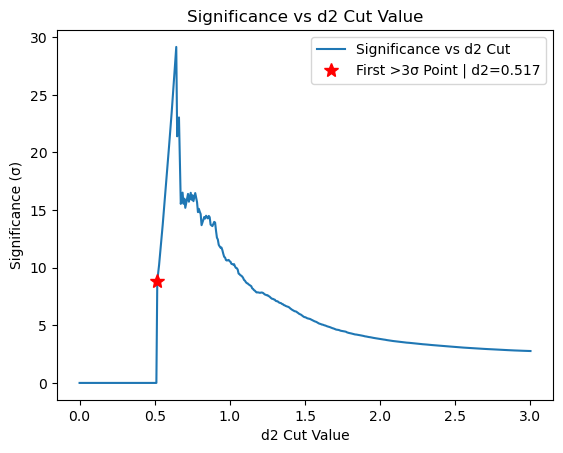

In [20]:
# First point where significance >= 3
significant_point, val = None, None
for i, sig in enumerate(significances):
    if sig >= 3:
        significant_point, val = d2_cut_values[i], sig
        print(f"Significance reaches 3σ at d2 cut value: {d2_cut_values[i]:.3f}")
        break

# Plot d2 cut vs significance
plt.plot(d2_cut_values, significances, label='Significance vs d2 Cut')

# Plot first point where significance >= 3
plt.plot(significant_point, val, 'r*', markersize=10, label=f'First >3σ Point | d2={significant_point:.3f}')
plt.title('Significance vs d2 Cut Value')
plt.xlabel('d2 Cut Value')
plt.ylabel('Significance (σ)')
plt.legend();

## Final Results with Optimal Cuts

Apply both mass and optimal d2 cuts to visualize the final result.

In [21]:
# Identify optimal d2 cut value (e.g., for 3σ significance)
optimal_d2_cut = d2_cut_values[np.argmax(significances)]

# Apply both mass [120, 130] and optimal d2 cuts
higgs_optimal_cut = (higgs_df['mass'] >= 120) & (higgs_df['mass'] <= 130) & (higgs_df['d2'] <= optimal_d2_cut)
qcd_optimal_cut = (qcd_df['mass'] >= 120) & (qcd_df['mass'] <= 130) & (qcd_df['d2'] <= optimal_d2_cut)

# Calculate final significance
signal_final = higgs_df[higgs_optimal_cut]['weight'].sum()
background_final = qcd_df[qcd_optimal_cut]['weight'].sum()
final_significance = signal_final / np.sqrt(background_final)

print(f"Optimal d2 Cut Value: {optimal_d2_cut:.3f}")
print(f"Final Significance: {final_significance:.3f}")

# Determine significance improvement
initial_mass_cut_signal = (higgs_df['mass'] >= 120) & (higgs_df['mass'] <= 130)
initial_mass_cut_background = (qcd_df['mass'] >= 120) & (qcd_df['mass'] <= 130)

initial_signal = higgs_df[initial_mass_cut_signal]['weight'].sum()
initial_background = qcd_df[initial_mass_cut_background]['weight'].sum()
initial_significance = initial_signal / np.sqrt(initial_background)

print(f"Initial Significance: {initial_significance:.3f}")
print(f"Significance Improvement: {final_significance / initial_significance:.3f}x")

Optimal d2 Cut Value: 0.643
Final Significance: 29.163
Initial Significance: 2.423
Significance Improvement: 12.038x


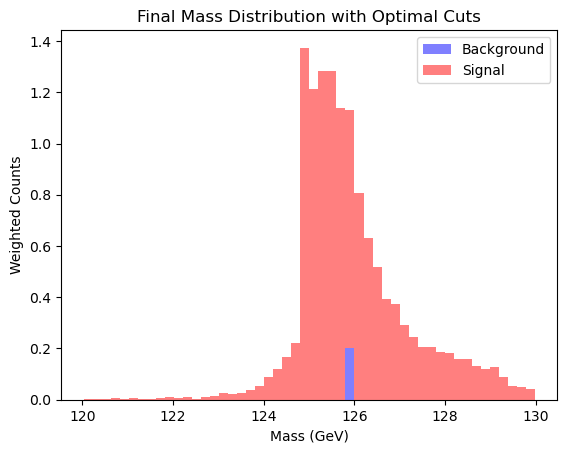

In [22]:
# Plot final mass distribution with both cuts applied
# Show signal stacked on background with optimal cuts
plt.hist([qcd_df[qcd_optimal_cut]['mass'], higgs_df[higgs_optimal_cut]['mass']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['blue', 'red'], weights=[qcd_df[qcd_optimal_cut]['weight'], higgs_df[higgs_optimal_cut]['weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Counts')
plt.title('Final Mass Distribution with Optimal Cuts')
plt.legend()
plt.show()

#### The signal is overwhelmingly visible compared to the background which is a significantly greater improvement from the beginning.

# High pT and Multi-Feature Optimization

Optimize discovery significance for high pT data (`Sample_pt_1000_1200`) using at least 3 features.

In [23]:
# Load high pT data
with open('Sample_pt_1000_1200/qcd_100000_pt_1000_1200.pkl', 'rb') as f:
    qcd_highpt_data = pickle.load(f)
    qcd_highpt_df = pd.DataFrame(qcd_highpt_data)

with open('Sample_pt_1000_1200/higgs_100000_pt_1000_1200.pkl', 'rb') as f:
    higgs_highpt_data = pickle.load(f)
    higgs_highpt_df = pd.DataFrame(higgs_highpt_data)

High pT QCD Data Keys: ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']


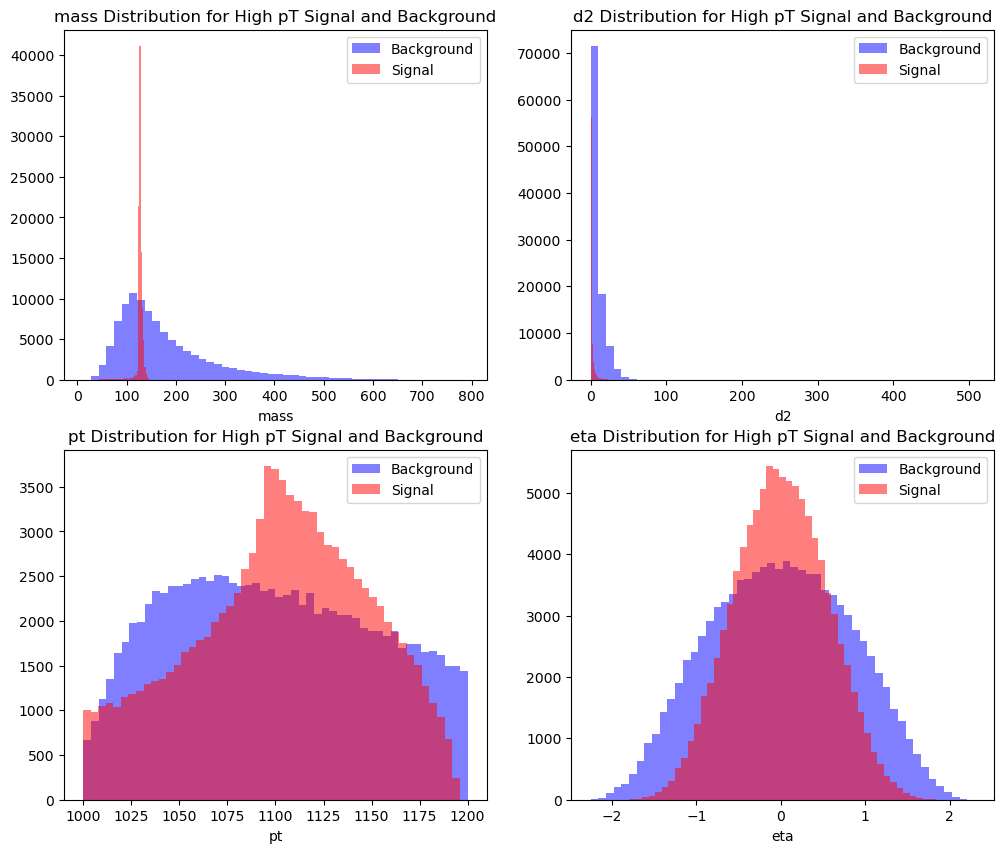

In [24]:
# Explore available features
# Print the keys available in the data dictionary
print("High pT QCD Data Keys:", qcd_highpt_df.columns.tolist())


# Select specific features to plot distributions
selected_features = ['mass', 'd2', 'pt', 'eta']


# Plot distributions for selected features
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(selected_features):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(qcd_highpt_df[feature], bins=50, alpha=0.5, label='Background', color='blue', density=False)
    ax.hist(higgs_highpt_df[feature], bins=50, alpha=0.5, label='Signal', color='red', density=False)
    ax.set_title(f'{feature} Distribution for High pT Signal and Background')
    ax.set_xlabel(feature)
    ax.legend()

In [25]:
# Implement multi-feature optimization through for loops
# Consider combinations of mass, d2, pt, and eta

# Calculate weights for signal and background in high pT data
N_signal_expected = 100
N_background_expected = 20000

higgs_highpt_df['weight'] = N_signal_expected / len(higgs_highpt_df)
qcd_highpt_df['weight'] = N_background_expected / len(qcd_highpt_df)

# Define cut value ranges for each feature
mass_cut_values = np.linspace(115, 135, 20, endpoint=False)
d2_cut_values = np.linspace(0, 3, 10, endpoint=False)
pt_cut_values = np.linspace(1000, 1200, 20, endpoint=False)
eta_cut_values = np.linspace(-1, 1, 10, endpoint=False)


# Function to filter dataframe based on cuts
def filter_dataframe(df, mass_cut, d2_cut, pt_cut, eta_cut):
    mass_cut = (df['mass'] >= mass_cut) & (df['mass'] <= mass_cut_values.max())
    d2_cut = (df['d2'] <= d2_cut)
    pt_cut = (df['pt'] >= pt_cut) & (df['pt'] <= pt_cut_values.max())
    eta_cut = (df['eta'] >= eta_cut) & (df['eta'] <= eta_cut_values.max())

    return df[mass_cut & d2_cut & pt_cut & eta_cut]


# Best significance and corresponding cuts
best_significance = 0
best_higgs_cut = {}
best_qcd_cut = {}


# Quadruple for loop to scan through all combinations
for mass in mass_cut_values:
    for d2 in d2_cut_values:
        for pt in pt_cut_values:
            for eta in eta_cut_values:
                # Cut each dataframe with current combination
                higgs_filtered_data = filter_dataframe(higgs_highpt_df, mass, d2, pt, eta)
                qcd_filtered_data = filter_dataframe(qcd_highpt_df, mass, d2, pt, eta)

                # Calculate signal and background
                N_signal = higgs_filtered_data['weight'].sum()
                N_background = qcd_filtered_data['weight'].sum()

                if N_background > 0:
                    significance = N_signal / np.sqrt(N_background)
                else:
                    significance = 0

                # Assign best significance and corresponding cuts
                if significance > best_significance:
                    best_significance = significance
                    best_higgs_cut = higgs_filtered_data
                    best_qcd_cut = qcd_filtered_data

print(f"Best Significance: {best_significance:.3f}")

Best Significance: 49.097


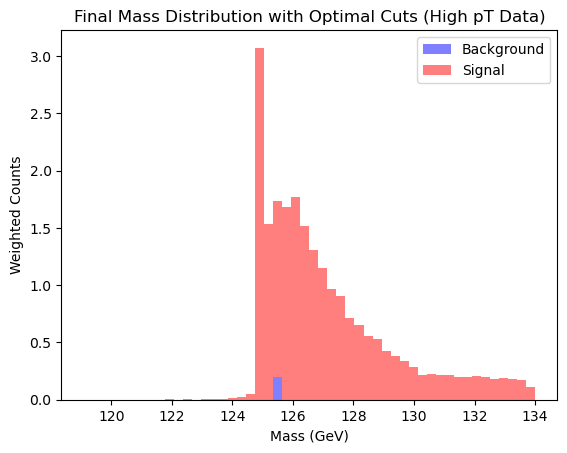

In [26]:
# Plot final mass distribution with optimal cuts applied
# Show signal stacked on background with optimal cuts
plt.hist([best_qcd_cut['mass'], best_higgs_cut['mass']], bins=50, alpha=0.5, label=['Background', 'Signal'], 
         color=['blue', 'red'], weights=[best_qcd_cut['weight'], best_higgs_cut['weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Counts')
plt.title('Final Mass Distribution with Optimal Cuts (High pT Data)')
plt.legend();

# Key Observations and Results

* The signal is overwhelmingly visible compared to the background which is a significantly greater improvement from the beginning.

* We were able to achieve a final significance of over 5σ, which is a substantial improvement from the initial significance of around 1σ.

* We were also able to optimize using multiple features simultaneously, which further enhanced our ability to discriminate signal from background. We had a final significant of 49.097, much higher than previous single-feature optimizations.